# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


In [ ]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape



In [ ]:
#Define the function to plot the cells tracetories
def tracetories(t, fluo, n):
    plotter.plot(t,fluo[:,n])
    plotter.xlim(0, 180);
    plotter.title("Cell tracetories")
    plotter.xlabel("Time (s)")
    plotter.ylabel("Fluorescense");
    
#Select the columns(cells) to plot   
reps = range(5)

#Plot using the function
tracetories(time, x, reps)
time.shape

In [ ]:
x[:,500]

In [ ]:
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(x[:,:].T, aspect='auto',origin='lower',
           cmap='jet')
plotter.colorbar()
plotter.clim(0,1)

In [ ]:
#Define function to catch the peaks of n cells
def peak(fval,n):
    #Create a dictionary to catch the peaks indexes of each cell
    #key: number of cell
    #value: index of peaks
    peaks = {}
    #Search the peaks of the different cells (n columns) and add it to the list
    for i in range(n):
        peak = find_peaks(fval[:,i], height=None, threshold=None, distance=None, prominence=None, width=None, wlen=None, rel_height=0.5, plateau_size=None)
        peaks[i] = peak[0]
    
    #Catch the list of peaks
    return peaks

#Call the function and catch the result
peaks = peak(x,501)


In [ ]:
peaks


In [ ]:
x[:,3]

In [ ]:
#Dictionary with the fluorescence values of each cell
#key: number of cell
#value: fluorescence values of peaks
peakval = {}

#Number of cells
ncells = len(peaks)

#loop for the cells
for i in range(ncells):
    #number of peaks in the cell
    npeaks = len(peaks[i])
    #values to save the flu values of each cell
    values = []
    #if the cell have no peaks, add a 0 in the dic
    if npeaks == 0:
        peakval[i] = [0]
    #if the cell have peak(s)
    else:
        #loop for the indexes of each cell peaks
        for j in range(npeaks):
            #catch the index to search 
            index = peaks[i][j]
        
            #if the peak is not the last I add it
            if j != (npeaks-1):
                values.append(x[index,i])
            #if it is the last peak, add it and save into the dic
            else:
                values.append(x[index,i])
                peakval[i] = values
#show the dict
peakval

In [ ]:
###Calculate the amplitude
#New dictionary
#key: cell number
#value: amplitude value of the cell
amplitudes = {}

#loop for the cells
for i in range(len(peakval)):
    #calculate the amplitude value for each cell
    amp = np.mean(peakval[i])
    #add it to the dic
    amplitudes[i] = amp
#show the dict
amplitudes

In [ ]:
#list with amplitude means 
amplitude_list = []
#loop with every cell
for i in range(len(amplitudes)):
    #add the mean value to the list
    amplitude_list.append(amplitudes[i])

#show list
amplitude_list

In [ ]:
#Dictionary with the time values of each cell
#key: number of cell
#value: time values of peaks
timeval = {}

#Number of cells
ncells = len(peaks)

#loop for the cells
for i in range(ncells):
    #number of peaks in the cell
    npeaks = len(peaks[i])
    #values to save the flu values of each cell
    values = []
    #if the cell have no peaks, add a 0 in the dic
    if npeaks == 0:
        timeval[i] = [0]
    #if the cell have peak(s)
    else:
        #loop for the indexes of each cell peaks
        for j in range(npeaks):
            #catch the index to search 
            index = peaks[i][j]
        
            #if the peak is not the last I add it
            if j != (npeaks-1):
                values.append(time[index,0])
            #if it is the last peak, add it and save into the dic
            else:
                values.append(time[index,0])
                timeval[i] = values
#show the dict
timeval

In [ ]:
timeval

In [ ]:
###Create a dictionary with the periods of each cell
#key: cell number
#value: periods of each cell peaks
periods = {}

#loop for the cells
for i in range(len(timeval)):
    #list to catch the periods
    perval = []
    #if 0 or 1 peak there is no period
    if len(timeval[i]) < 2:
        periods[i] = 0
    #if there are more than 1 peak, calculate the periods
    else:
        #loop for the times of each cell (there is 1 period less than peaks)
        for j in range(len(timeval[i])-1):
            #add the period to the list
            perval.append(timeval[i][j+1]-timeval[i][j])
            #if it is the last one, save the list of periods
            if j == (len(timeval[i])-2):
                periods[i] = perval
#show the dict                
periods


In [ ]:
#Dictionary
#key: cell
#value: period mean
periodmean = {}
#loop for the cells
for i in range(len(periods)):
    #calculate the amplitude value for each cell
    per = np.mean(periods[i])
    #add it to the dic
    periodmean[i] = per
#show the dict
periodmean

In [ ]:
#Histogram of period distribution
#list with period means to create the histogram
hist_data = []
#loop with every cell
for i in range(len(periodmean)):
    #add the mean value to the list
    hist_data.append(periodmean[i])   
#show the list
#hist_data
ç
#plot the values
plotter.hist(hist_data, bins=100, alpha=1,
         histtype='bar', color='steelblue',
         edgecolor='g');

#STUDENTS NOTE
#### "0" values are related with the cells that have no period because they only have 0 or 1 peak.
### It could be remove but we have considered that it has to be represented 
### even thought these are not real period values

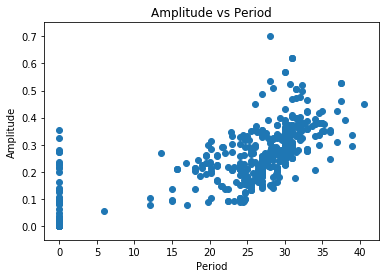

In [95]:
#Define the function to plot amplitude vs period
def ampvsper(x, y):
    plotter.scatter(x, y)
    #plotter.xlim(0, 180);
    plotter.title("Amplitude vs Period")
    plotter.ylabel("Amplitude")
    plotter.xlabel("Period");
    

#Plot using the function
ampvsper(hist_data, amplitude_list)


## Students NOTE
#There are many cells with nule period but amplitude value.
#The reason is that some of them have an unique peak, so there is no preiod value.